## Use K-means machine learning algorithm to create a customer segmentation model

In [2]:
import pandas as pd

download dataset from Kaggle :
https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data

In [3]:
df = pd.read_csv('data/Mall_Customers.csv')

In [4]:
# have a quick look of our data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# statistics of our data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
#check if any missing value in our data
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
#number of rows, types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
#change column names as some orignal column names are annoying 
df.rename(columns={'Annual Income (k$)':'AnnualIncome','Spending Score (1-100)':'SpendingScore'},inplace=True)
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### EDA

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns

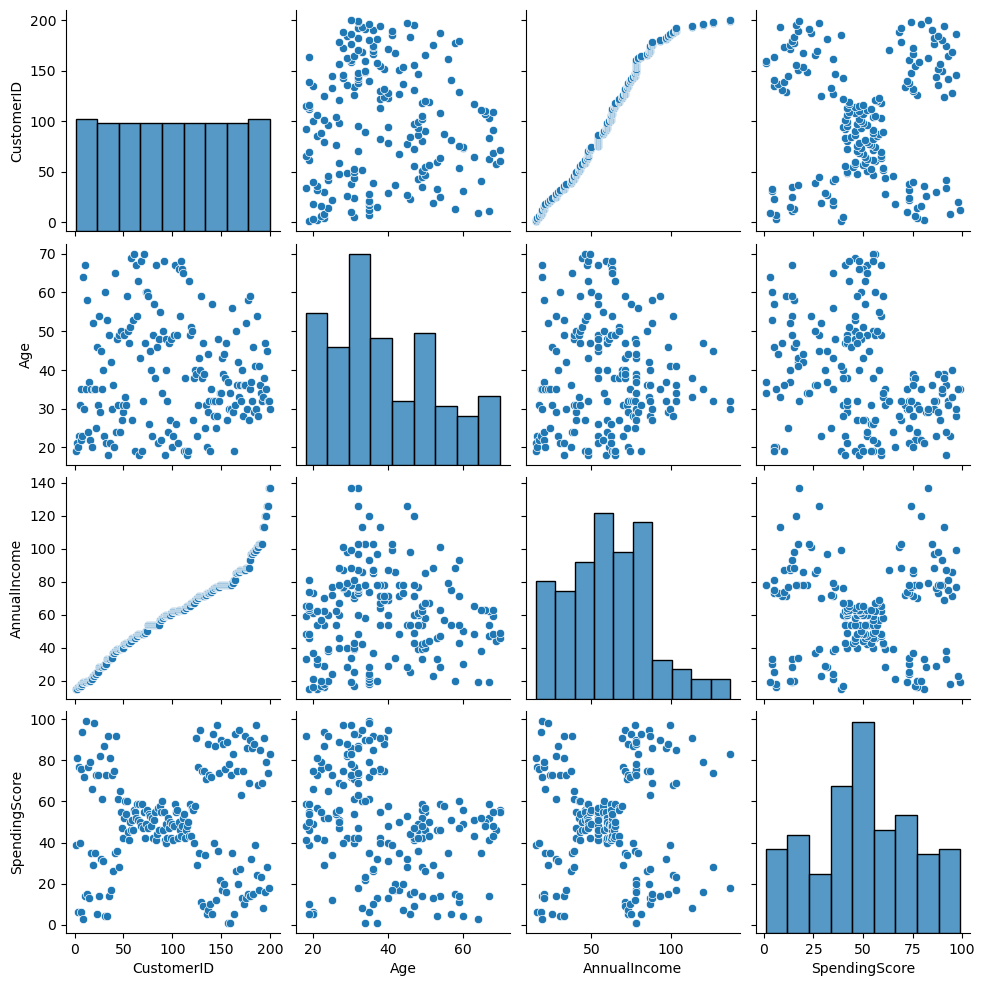

In [10]:
sns.pairplot(df)

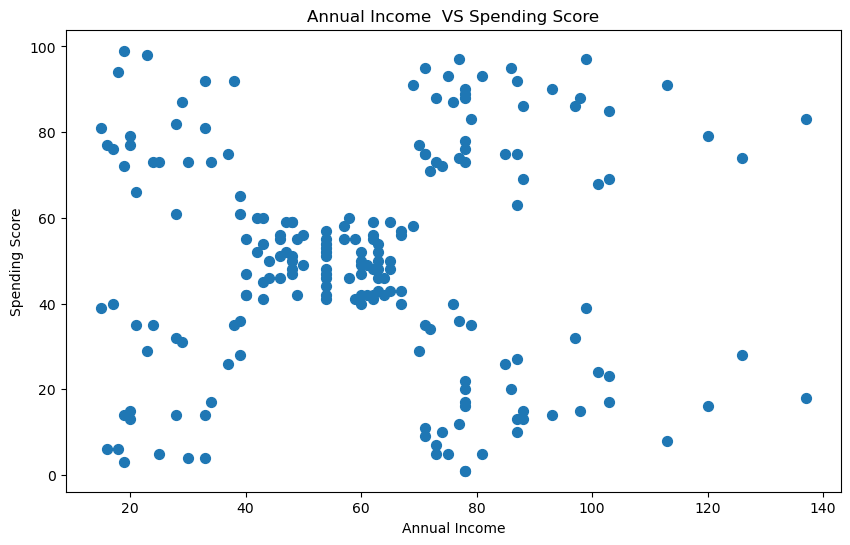

In [11]:
# Let's take a closer look at the AnnualIncome vs SpendingScore  via plt
plt.figure(figsize = (10,6))
plt.scatter(df['AnnualIncome'],df['SpendingScore'], s=50)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income  VS Spending Score')
plt.show()

### Clustering

In [12]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans

In [13]:
# X is our feature dataset that feed into KMeans algo
X = df[['AnnualIncome','SpendingScore']]

In [14]:
X

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [15]:
# Use KMeans and select the most proper number of K (number of cluster that we need)

wcss = []

for i in range(1,11):
    
    # max_iter is the max tries if the algo don't converge
    # n_init is Number of times the k-means algorithm is run with different centroid seeds. 
    # random_state is to determine random number generation for centroid initialization which makes sure that the outcome will be the same in next run 
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    # inertia_ is the sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
    wcss.append(kmeans.inertia_)

C:\Users\michael.shen\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
wcss

[269981.28,
 181363.595959596,
 106348.37306211119,
 73679.78903948837,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25095.703209997548,
 21830.041978049434,
 20736.679938924124]

Text(0.5, 1.0, 'elbow method to determine the optimal K')

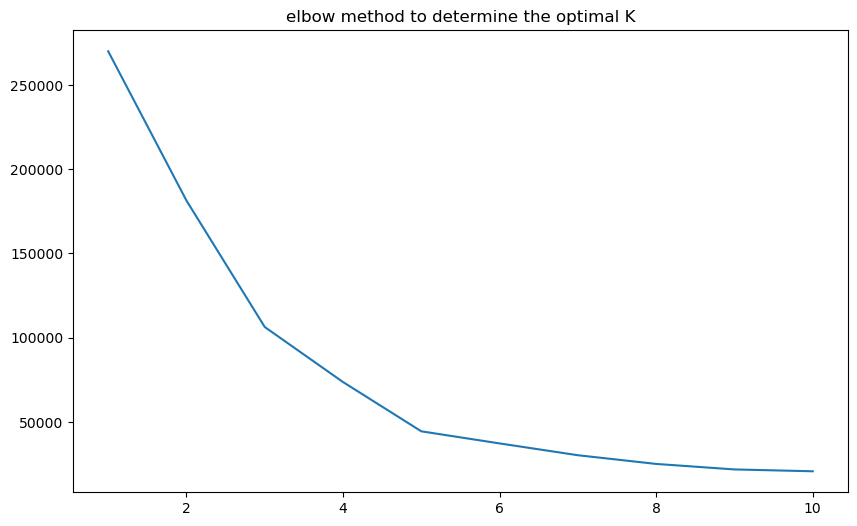

In [18]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11),wcss)
plt.title('elbow method to determine the optimal K')

In [28]:
# We figure out that k=5 is the optimal one 
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit(X)

In [30]:
y_kmeans.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [60]:
# We can simply use y_kmeans = kmeans.fit_predict(X)  to repleace fit and labels_
# https://stackoverflow.com/questions/66793419/fit-vs-fit-predict-methods-in-sklearn-kmeans

In [33]:
# write the labels(Cluster index) back to dataframe 
df['Cluster'] = y_kmeans.labels_
df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


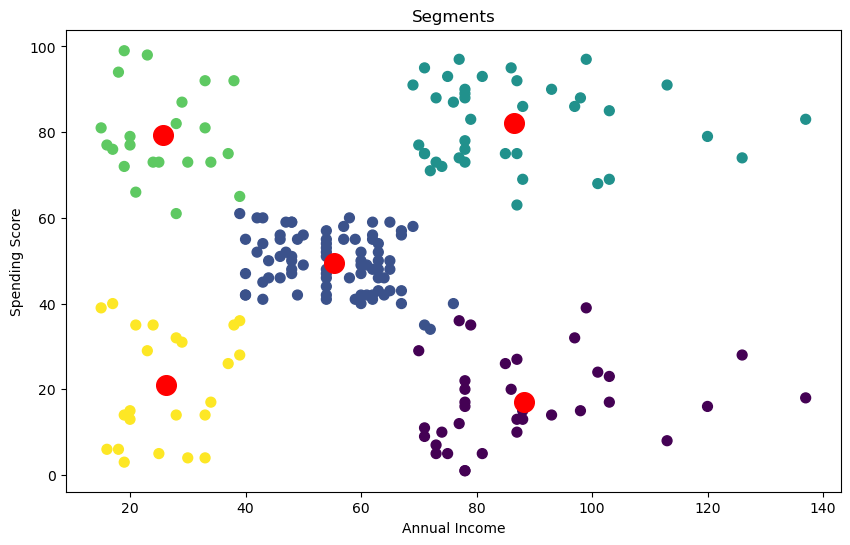

In [45]:
plt.figure(figsize = (10,6))
plt.scatter(X['AnnualIncome'],X['SpendingScore'],c=y_kmeans.labels_, s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red', s=200)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Segments')
plt.show()

In [42]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

##  Three features


In [46]:
X = df[['Age','AnnualIncome','SpendingScore']]

In [47]:
wcss = []

for i in range(1,11):
    
    # max_iter is the max tries if the algo don't converge
    # n_init is Number of times the k-means algorithm is run with different centroid seeds. 
    # random_state is to determine random number generation for centroid initialization which makes sure that the outcome will be the same in next run 
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    # inertia_ is the sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
    wcss.append(kmeans.inertia_)

C:\Users\michael.shen\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'elbow method to determine the optimal K')

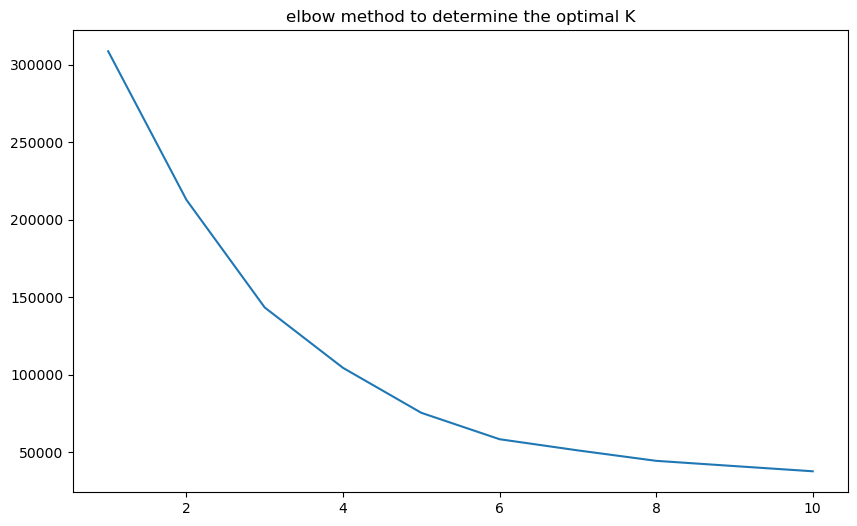

In [48]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11),wcss)
plt.title('elbow method to determine the optimal K')

In [51]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X) 

In [52]:
y_kmeans

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 5, 3, 5, 4,
       0, 3, 5, 4, 4, 4, 5, 4, 4, 5, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 4,
       5, 5, 4, 4, 5, 5, 5, 5, 5, 4, 5, 4, 4, 5, 5, 4, 5, 5, 4, 5, 5, 4,
       4, 5, 5, 4, 5, 4, 4, 4, 5, 4, 5, 4, 4, 5, 5, 4, 5, 4, 5, 5, 5, 5,
       5, 4, 4, 4, 4, 4, 5, 5, 5, 5, 4, 4, 4, 1, 4, 1, 2, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6,
       7, 6])

In [53]:
# write the labels(Cluster index) back to dataframe 
df['Cluster3Feattures'] = y_kmeans
df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster,Cluster3Feattures
0,1,Male,19,15,39,4,0
1,2,Male,21,15,81,3,3
2,3,Female,20,16,6,4,0
3,4,Female,23,16,77,3,3
4,5,Female,31,17,40,4,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,6
196,197,Female,45,126,28,0,7
197,198,Male,32,126,74,2,6
198,199,Male,32,137,18,0,7


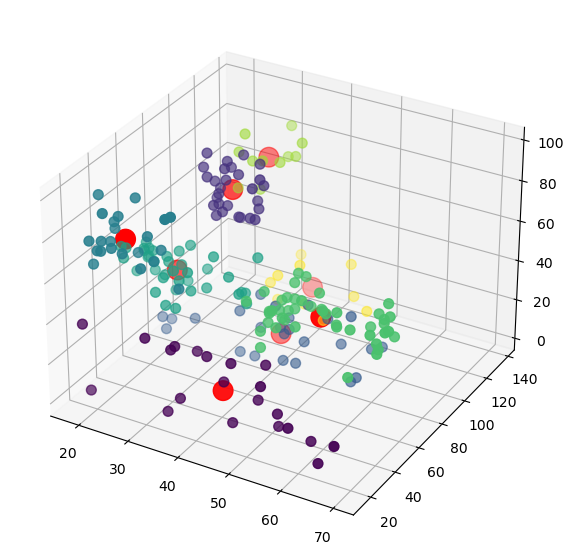

In [59]:
# Visualize  it in 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize =(10,7))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df['Age'],df['AnnualIncome'],df['SpendingScore'],c=df['Cluster3Feattures'],s=50)
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],c='red',s=200)

In [57]:
centroids = kmeans.cluster_centers_